# PART A: Unsupervised Learning 


# k- means clustering


In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# load the iris datasets
dataset = load_iris()
print(dataset)

#as data is unbalanced, perform feature scaling (standardization) to prevent larger features from dominating others during clustering

from sklearn import preprocessing

scalar = preprocessing.StandardScaler()
scalar.fit(dataset.data)
scaled_data=scalar.transform(dataset.data)
#print(scaled_data)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


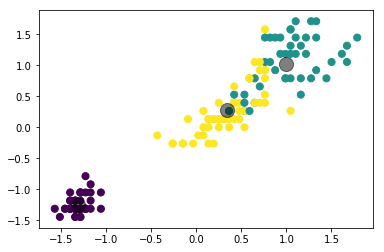

In [2]:
# performing k-means on scaled data
# fit a Kmeans model to the data, using 3 centroid centres first
model = KMeans(n_clusters=3) 
model.fit(scaled_data)
print(model)

# Visualize the results
import matplotlib.pyplot as plt
y_kmeans = model.predict(scaled_data) #using trained Kmeans model to generate predicted classification for data in dataset
# scatter plot the petal length (column 2), petal width (column 3)
plt.scatter(scaled_data[:, 2], scaled_data[:, 3], c=y_kmeans, s=50, cmap='viridis')
# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)


For n_clusters=2, The Silhouette Coefficient is 0.5817500491982808
For n_clusters=3, The Silhouette Coefficient is 0.45994823920518635
For n_clusters=4, The Silhouette Coefficient is 0.3850967228966387
For n_clusters=5, The Silhouette Coefficient is 0.3451968801684982


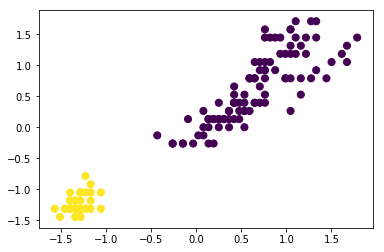

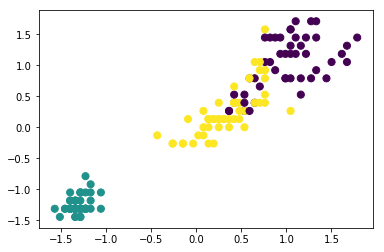

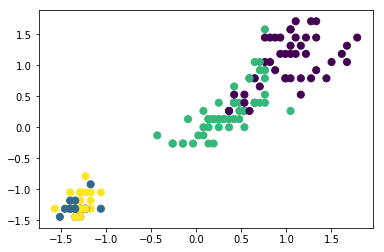

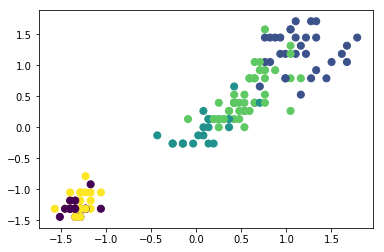

In [3]:
# Clustering silhouette_score to determine which k is most suitable
from sklearn.metrics import silhouette_score


for n_cluster in range(2, 6):
    kmeans = KMeans(n_clusters=n_cluster).fit(scaled_data) #building Kmeans model for k range 2 to 5
    label = kmeans.labels_ #generate predicted classification for each K range
    sil_coeff = silhouette_score(scaled_data, label, metric='euclidean') #finding the silhouette coefficient for each krange
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(
            n_cluster, sil_coeff))
    #plotting for each kmean iteration
    plt.figure()
    plt.scatter(scaled_data[:, 2], scaled_data[:, 3], c=label, s=50, cmap='viridis')
    
plt.show()



As the silhouette coefficient is the highest at k = 2, as such it is the best value of k for kmeans clustering method of iris dataset. However, as we have prior knowledge, the best k should be 3, but in this case our data is better separated with 2 clusters unfortunately

# Gaussian Mixture Modelling

For n_components=2, The Silhouette Coefficient is 0.5817500491982808
For n_components=3, The Silhouette Coefficient is 0.37416491866541235
For n_components=4, The Silhouette Coefficient is 0.24310929877682397
For n_components=5, The Silhouette Coefficient is 0.1765846261385426


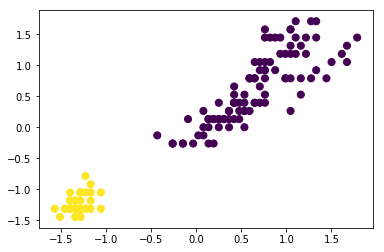

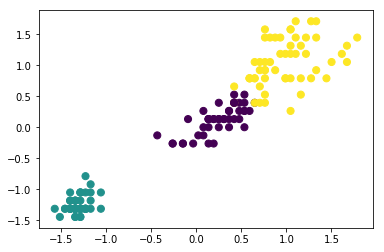

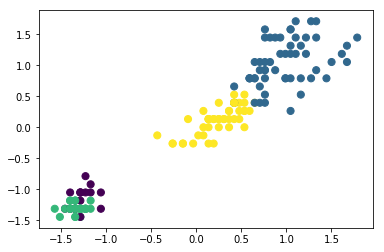

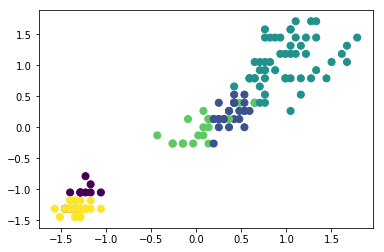

In [6]:
# performing gmm on scaled data
# fit a gmm model to the data, using 3 centroid centres first
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm.fit(scaled_data)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(scaled_data)
y_cluster_gmm

# Clustering silhouette_score to determine which number of components is most suitable
for n_components in range(2, 6):
    gmmss = GaussianMixture(n_components=n_components)
    gmmss.fit(scaled_data)
    gmmlabel = gmmss.predict(scaled_data) #generate predicted classification for each number range
    gmm_sil_coeff = silhouette_score(scaled_data, gmmlabel, metric='euclidean') #finding the silhouette coefficient for each range
    print("For n_components={}, The Silhouette Coefficient is {}".format(
            n_components, gmm_sil_coeff))
    #plotting for each gmm iteration
    plt.figure()
    plt.scatter(scaled_data[:, 2], scaled_data[:, 3], c=gmmlabel, s=50, cmap='viridis')
    
plt.show()

For both k-means and gaussian mixture modelling provided 2 clusters as the best number of clusters, as such the two clustering methods can be improved. To check which modelling method is better, we can use adjusted_rand_score to compare with the true labels

In [7]:
from sklearn.metrics.cluster import adjusted_rand_score

#k-means with k = 3 pitted against species
score_kmean = adjusted_rand_score(dataset.target, y_kmeans)
print("The score for k-means is {}".format(score_kmean))

#gaussian mixture modelling with components = 3 pitted against species
score_gmm = adjusted_rand_score(dataset.target, y_cluster_gmm)
print("The score for GMM is {}".format(score_gmm))

The score for k-means is 0.6201351808870379
The score for GMM is 0.9038742317748124


As the score for Gaussian Mixture Modelling is higher, it means Gaussian Mixture Modelling is the better model matching the true labels

# PART B: Deep Learning

7


(60000, 28, 28)

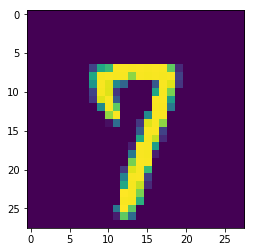

In [34]:
import numpy
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#print(y_train)

#show a random number image as a plot
print(y_train[888])
plt.imshow(X_train[888])

X_train.shape

In [35]:
## Data Engineering
# flatten 28*28 images to a 784 vector for each image and reshaping the data so that it can work with the Keras API
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
# normalizing features from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [37]:
## Building the model and configuring hyperparameters
model = Sequential()
#using sequential model and building it with layers
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2)) # to prevent overfitting
model.add(Dense(10,activation=tf.nn.softmax)) # 10 neurons to figure out probability
model.compile(optimizer ="adam", loss = 'sparse_categorical_crossentropy', metrics =['accuracy']) #metrics to determine accuracy and loss
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.2619 - accuracy: 0.9223
Epoch 2/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1124 - accuracy: 0.9654
Epoch 3/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0775 - accuracy: 0.9762
Epoch 4/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0605 - accuracy: 0.9806
Epoch 5/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0495 - accuracy: 0.9838
Epoch 6/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0408 - accuracy: 0.9865
Epoch 7/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0356 - accuracy: 0.9884
Epoch 8/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0304 - accuracy: 0.9892
Epoch 9/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0266 - accuracy: 0.9914
Epoch 10/10
60000/60000 [=============================

In [40]:
## Evaluating the model
score = model.evaluate(X_test, y_test)
print("The test loss is {}.".format(score[0]) +"The accuracy is {}.".format(score[1]))

10000/10000 [==============================] - 0s 31us/step
The test loss is 0.08960245289382801.The accuracy is 0.978600025177002.


7


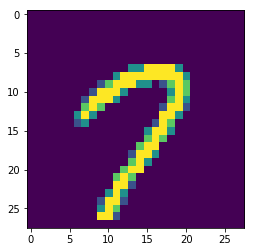

In [44]:
## Sample Test 1 of model 

#plot the image from X_test
image_index = 3423
plt.imshow(X_test[image_index].reshape(28, 28))

#predict using the model with X_test
predicted_y = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(predicted_y.argmax())

8


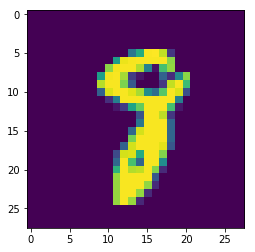

In [47]:
## Sample Test 2 of model 

#plot the image from X_test
image_index = 435
plt.imshow(X_test[image_index].reshape(28, 28))

#predict using the model with X_test
predicted_y = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(predicted_y.argmax())